# pythia-action-selection
Plot and analyze the action selection distributions of several offset prefetchers
(Pythia, Cygnus, BO)

*TODO*

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display

In [16]:
pythia_dir = '/scratch/cluster/cmolder/pythia/degree1_tuned/'
pythia_biasonly_dir = '/scratch/cluster/cmolder/pythia/degree1_featureless_tuned/'
cygnus_dir = '/scratch/cluster/cmolder/pythia/degree1_featureless_tuned/'
cygnus_timelyacc_dir = '/scratch/cluster/cmolder/pythia/degree1_featureless_tuned_timelyacc/'
bo_dir = '/scratch/cluster/cmolder/pythia/degree1_featureless_tuned/'

traces = ['libquantum_1210B', 'mcf_46B']

In [21]:
def load_bo_action_distribution(path: str):
    chosen = {}
    with open(path) as f:
        for line in f:
            if 'prefetched=' in line:
                line = line.replace(' :', ':')
                action = line.split()[0].rstrip(':')
                if action == 'bo':
                    continue
                chosen[int(action)] = int(line.split()[2].split('=')[1])
    return chosen

def load_pythia_action_distribution(path: str):
    chosen = {}
    with open(path) as f:
        for line in f:
            if 'learning_engine_featurewise.action.index_' in line:
                action = int(line.split('_')[3])
                if action not in chosen:
                    chosen[action] = 0
                chosen[int(action)] += int(line.split()[1])
    return chosen

def load_cygnus_action_distribution(path: str):
    chosen = {}
    with open(path) as f:
        for line in f:
            if 'chosen:' in line:
                action = line.split()[0]
                if action == 'total':
                    continue
                chosen[int(action)] = int(line.split()[4])
    return chosen

def get_pythia_trace_path(exp_dir, trace, prefetcher, features, seed=1337):
    pref_degree = 1
    features_str = ",".join([str(f) for f in features])
    results_file = f'{trace}-l2pf_{prefetcher}_{pref_degree}-pythia_features_{features_str}-seed_{seed}.txt'
    return os.path.join(exp_dir, 'champsim_results', results_file)

def get_trace_path(exp_dir, trace, prefetcher, seed=1337):
    if 'cygnus' in prefetcher:
        pref_degree = 0
    else:
        pref_degree = 1

    results_file = f'{trace}-l2pf_{prefetcher}_{pref_degree}-seed_{seed}.txt'
    return os.path.join(exp_dir, 'champsim_results', results_file)

# Action distribution tables

In [4]:
def dict_to_table(dict, trace):
    return pd.DataFrame(dict[trace]).replace(np.nan, 0).astype(int).sort_index()

In [22]:
tables = {}
for trace in traces:
    tables[trace] = {}
    tables[trace]['pythia'] = load_pythia_action_distribution(get_pythia_trace_path(pythia_dir, trace, 'pythia', (8, 10)))
    tables[trace]['pythia_biasonly'] = load_pythia_action_distribution(get_trace_path(pythia_biasonly_dir, trace, 'pythia'))
    tables[trace]['cygnus'] = load_cygnus_action_distribution(get_trace_path(cygnus_dir, trace, 'cygnus'))
    tables[trace]['cygnus_timelyacc'] = load_cygnus_action_distribution(get_trace_path(cygnus_timelyacc_dir, trace, 'cygnus'))
    tables[trace]['bo'] = load_bo_action_distribution(get_trace_path(bo_dir, trace, 'bo'))

## libquantum_1210B

In [23]:
dict_to_table(tables, 'libquantum_1210B')

,pythia,pythia_biasonly,cygnus,cygnus_timelyacc,bo
-40,0,0,0,0,0
-36,0,0,0,0,0
-32,0,0,0,0,0
-30,0,0,0,0,0
-24,0,0,0,0,0
-20,0,0,0,0,0
-18,0,0,0,0,0
-16,0,0,0,0,0
-15,0,0,0,0,0
-14,0,0,0,0,0


## mcf_46B

In [24]:
dict_to_table(tables, 'mcf_46B')

,pythia,pythia_biasonly,cygnus,cygnus_timelyacc,bo
-40,0,0,0,0,0
-36,0,0,0,0,0
-32,0,0,0,0,0
-30,0,0,0,0,0
-24,0,0,0,0,0
-20,0,0,0,0,0
-18,0,0,0,0,0
-16,0,0,0,0,0
-15,0,0,0,0,0
-14,0,0,0,0,0


# Action distribution plots

In [198]:
def dict_to_plot(dict, trace, prefetcher, color='C0'):
    fig, ax = plt.subplots()
    df = dict_to_table(dict, trace)[prefetcher]
    df.plot.bar(ax=ax, figsize=(8, 3), color=color)

    fig.suptitle(f'{prefetcher} action distribution on {trace}')

## libquantum_1210B

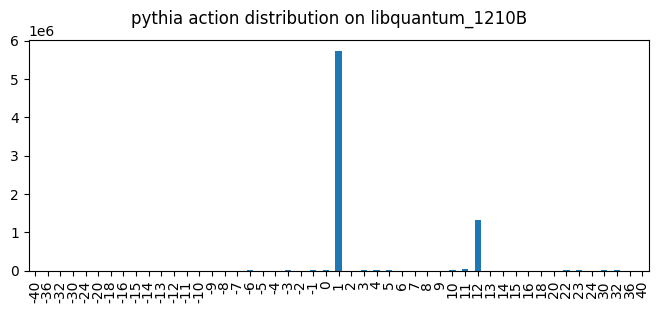

In [199]:
dict_to_plot(tables, 'libquantum_1210B', 'pythia')

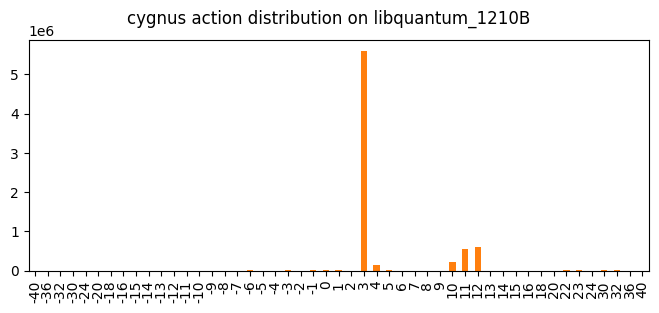

In [181]:
dict_to_plot(tables, 'libquantum_1210B', 'cygnus', color='C1')

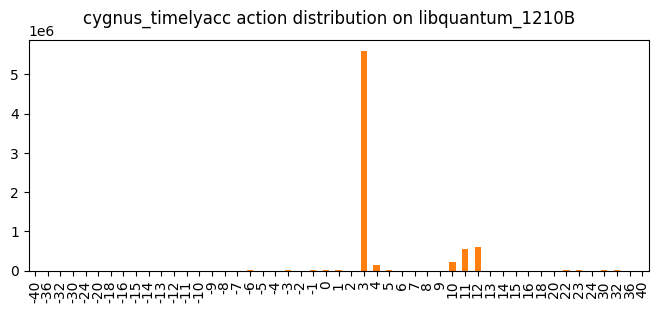

In [200]:
dict_to_plot(tables, 'libquantum_1210B', 'cygnus_timelyacc', color='C1')

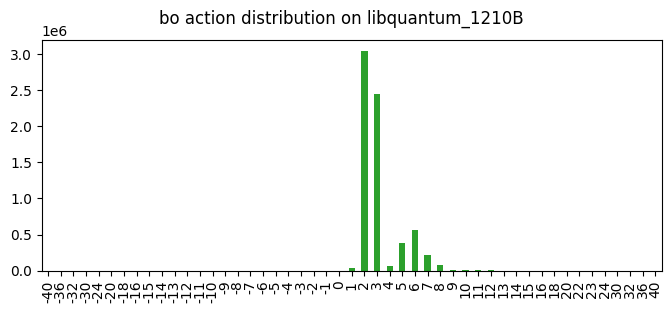

In [201]:
dict_to_plot(tables, 'libquantum_1210B', 'bo', color='C2')

## mcf_46B